## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Drug_study_base_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer" )
# Display the data table for preview
Drug_study_base_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print(Drug_study_base_df["Mouse ID"].nunique())

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#### Get a copy of the merged input
Drug_Analysis_Base_df = Drug_study_base_df
# print(Drug_study_base_df.count())
#### Build a count file to identify duplicate rows, and get it clean and concise
Drug_Study_Count_df = pd.DataFrame(Drug_study_base_df.groupby(["Mouse ID","Timepoint"]).count())
Drug_Study_Count_df = Drug_Study_Count_df.drop(columns=["Sex","Age_months","Weight (g)","Tumor Volume (mm3)", "Metastatic Sites"])
Drug_Study_Count_df = Drug_Study_Count_df.rename(columns={"Drug Regimen": "Count"})


#### Merge the counts with the base Data to get counts with the rows
Drug_Study_Flagged_df = pd.merge(Drug_Analysis_Base_df, Drug_Study_Count_df, on = ["Mouse ID","Timepoint"]) 
# # print(Drug_study_base_df.count())


#### List the bad Mice...
Bad_Mice_IDs = Drug_Study_Flagged_df.loc[Drug_Study_Flagged_df['Count'] > 1,"Mouse ID"].unique()
Bad_Mice_IDs

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#### Select the entries where the mouse ID matches what was found above
Bad_Mice_Data = Drug_Study_Flagged_df.loc[Drug_Study_Flagged_df['Mouse ID'] == "g989"]
Bad_Mice_Data
# print(Drug_study_base_df.count())
# print(Drug_study_base_df.count())

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Count
908,g989,Propriva,Female,21,26,0,45.000000,0,2
909,g989,Propriva,Female,21,26,0,45.000000,0,2
910,g989,Propriva,Female,21,26,5,48.786801,0,2
911,g989,Propriva,Female,21,26,5,47.570392,0,2
912,g989,Propriva,Female,21,26,10,51.745156,0,2
913,g989,Propriva,Female,21,26,10,49.880528,0,2
914,g989,Propriva,Female,21,26,15,51.325852,1,2
915,g989,Propriva,Female,21,26,15,53.442020,0,2
916,g989,Propriva,Female,21,26,20,55.326122,1,2
917,g989,Propriva,Female,21,26,20,54.657650,1,2


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#######################################################################
############### Discuss These   #######################################
#######################################################################
###### Option 1 - Simple copy while deleting based on loc
# Drug_Study_Clean_Data_df = Drug_Study_Flagged_df.loc[Drug_Study_Flagged_df['Mouse ID'] != "g989"]
#######################################################################
###### Option 2 - "Dropping as described in the instructions, more complex
# index_names = Drug_Study_Clean_Data_df[(Drug_Study_Clean_Data_df['Mouse ID'] == "g989")].index 
# Drug_Study_Clean_Data_df.drop(index_names, inplace = True) 
#######################################################################
###### Discussion 1 - .copy(deep=True) so the original file is not changed  
# Drug_Study_Clean_Data_df = Drug_Study_Flagged_df.copy(deep=True) # Original NOT changed
# Drug_Study_Clean_Data_df = Drug_Study_Flagged_df # Original Changed 
#######################################################################
###### Discussion 2 - .copy fails...with: TypeError: 'method' object is not subscriptable 
# Drug_Study_Clean_Data_df = Drug_Study_Flagged_df.copy # This FAILS 
#######################################################################

Drug_Study_Clean_Data_df = Drug_Study_Flagged_df.copy(deep=True)
print(f"Drug Study Flagged= \n{Drug_Study_Flagged_df.count()}")
print(f"\n\nDrug Study Clean Data= \n{Drug_Study_Clean_Data_df.count()}")

index_names = Drug_Study_Clean_Data_df[(Drug_Study_Clean_Data_df['Mouse ID'] == "g989")].index 
  
# drop these given row 
# indexes from dataFrame 
Drug_Study_Clean_Data_df.drop(index_names, inplace = True) 
Drug_Study_Clean_Data_df.head()
# print(index_names)
print(f"\n\nDrug Study Clean Data= \n{Drug_Study_Clean_Data_df.count()}")
print(f"\n\nDrug Study Flagged= \n{Drug_Study_Flagged_df.count()}")

Drug Study Flagged= 
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Count                 1893
dtype: int64


Drug Study Clean Data= 
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Count                 1893
dtype: int64


Drug Study Clean Data= 
Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
Count                 1880
dtype: int64


Drug Study Flagged= 
Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
T

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#### Create Base Table
#### Create Summary Table with Mean as a starting column
Drug_Analysis_Summary_1_df = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean())
##### Rename the Mean Column
Drug_Analysis_Summary_1_df = Drug_Analysis_Summary_1_df.rename(columns={"Tumor Volume (mm3)": "Mean"}) 

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
##### Add the Other Summary Statistics  
Drug_Analysis_Summary_1_df["Median"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].median())
Drug_Analysis_Summary_1_df["Variance"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].var())
Drug_Analysis_Summary_1_df["Std_Deviation"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].std())
Drug_Analysis_Summary_1_df["SEM"] = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem())

# Assemble the resulting series into a single summary dataframe.
##### Print the Summary DataFrame
Drug_Analysis_Summary_1_df
# print(type(Drug_Analysis_Summary_1_df))
# print(Drug_Analysis_Summary_1_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
Mean             float64
Median           float64
Variance         float64
Std_Deviation    float64
SEM              float64
dtype: object


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Drug_Analysis_Summary_2_df = Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].agg(Mean="mean",Median="median",Variance="var",Std_Deviation="std",SEM="sem")

#### Display the DataFrame
Drug_Analysis_Summary_2_df

,Mean,Median,Variance,Std_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<BarContainer object of 10 artists>

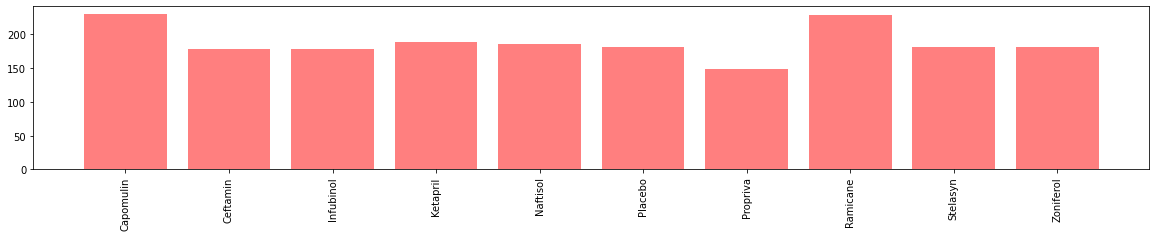

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#### Set x axis and tick locations
# Drug_Bar_Data_df = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].count())

Drug_Bar_Data_df = pd.DataFrame(Drug_Study_Clean_Data_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].count())
Drug_Bar_Data_df = Drug_Bar_Data_df.rename(columns={"Tumor Volume (mm3)": "Measurement_Count"}) 
# print(type(Drug_Bar_Data_df))
# print(Drug_Bar_Data_df.dtypes)

x_axis = np.arange(len(Drug_Bar_Data_df))
tick_locations = [value for value in x_axis]

# Drug_Bar_Data_df

plt.figure(figsize=(20,3))
plt.xticks(tick_locations, Drug_Bar_Data_df.index, rotation="vertical")
plt.bar(x_axis, Drug_Bar_Data_df["Measurement_Count"], color='r', alpha=0.5, align="center")


In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



([<matplotlib.patches.Wedge at 0x1e03e1b7880>,
 [Text(-1.0885520243047433, 0.15828610293404183, 'Crunch'),
  Text(-0.15186933688004167, -1.240739982637626, 'Planet Fitness'),
  Text(1.052056328361426, 0.3212125183654517, 'NY Sports Club'),
  Text(-0.29735455302063113, 1.0590468685558259, "Rickie's Gym")],
 [Text(-0.593755649620769, 0.08633787432765917, '17.6%'),
  Text(-0.09112160212802499, -0.7444439895825755, '33.1%'),
  Text(0.5738489063789596, 0.1752068281993373, '30.2%'),
  Text(-0.16219339255670787, 0.5776619283031778, '19.1%')])

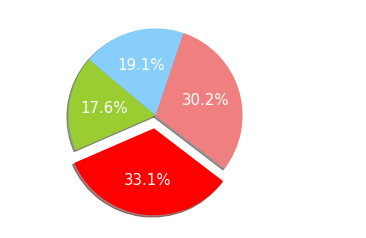

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gyms = ["Crunch", "Planet Fitness", "NY Sports Club", "Rickie's Gym"]
members = [49, 92, 84, 53]
x_axis = np.arange(0, len(gyms))
colors = ["yellowgreen", "red", "lightcoral", "lightskyblue"]
explode = (0, 0.15, 0, 0)


plt.pie(members, explode=explode, labels=gyms, colors=colors,textprops={'color':"w", 'size':15},
        autopct="%1.1f%%", shadow=True, startangle=140)

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
